[803.33333333]


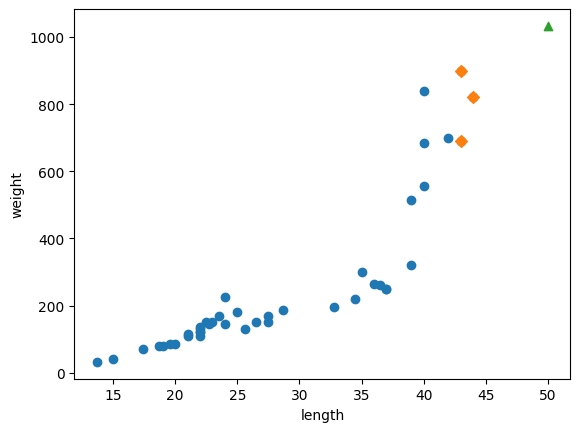

803.3333333333334
[803.33333333]


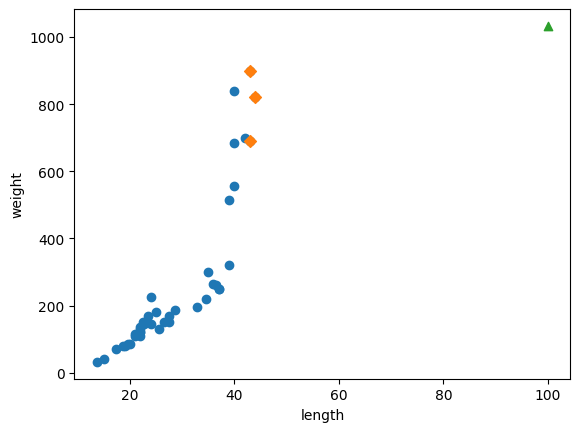

[759.59351263]
[23.05857454] -393.33521433567125


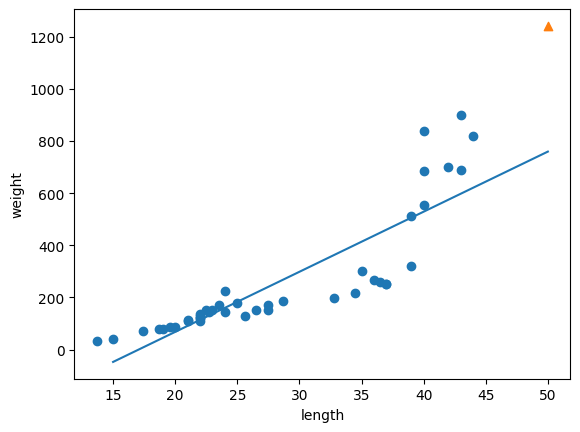

0.7385598562212896
0.702886265147229
(42, 2) (14, 2)
[1174.9105823]
[  1.2683275  -52.68488892] 638.3362766343242


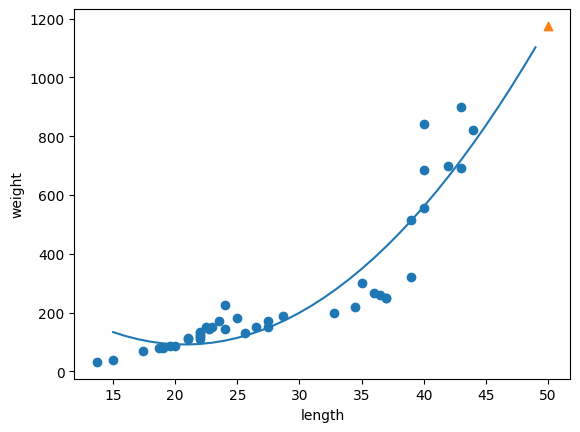

0.8470307052193281
0.6854234110140244


In [5]:
# k-최근접 이웃의 한계

import numpy as np
perch_length = np.array(
[ 8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0,
21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5,
22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5,
27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0,
36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0,
40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
)

perch_weight = np.array(
[ 5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0,
110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0,
130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0,
130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0,
197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0,
514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0,
820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0,
1000.0, 1000.0]
)
# Ensure both arrays have the same length
perch_weight = perch_weight[:len(perch_length)]

from sklearn.model_selection import train_test_split
# 훈련 세트와 테스트 세트로 분류
train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state=42)

# 훈련 세트와 테스트 세트를 2차원 배열로 바꿈
train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)

from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor(n_neighbors=3)

# k-최근접 이웃 회귀 모델을 훈련합니다
knr.fit(train_input, train_target)
print(knr.predict([[50]]))

import matplotlib.pyplot as plt
# 50cm 농어의 이웃을 구합니다
distances, indexes = knr.kneighbors([[50]])
# 훈련 세트의 산점도를 그립니다
plt.scatter(train_input, train_target)
# 훈련 세트 중에서 이웃 샘플만 다시 그립니다
plt.scatter(train_input[indexes], train_target[indexes], marker='D')
# 50cm 농어 데이터
plt.scatter(50, 1033, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

print(np.mean(train_target[indexes]))
print(knr.predict([[100]]))

# 100cm 농어의 이웃을 구합니다
distances, indexes = knr.kneighbors([[100]])
# 훈련 세트의 산점도를 그립니다
plt.scatter(train_input, train_target)
# 훈련 세트 중에서 이웃 샘플만 다시 그립니다
plt.scatter(train_input[indexes], train_target[indexes], marker='D')
# 100cm 농어 데이터
plt.scatter(100, 1033, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

# 선형 회귀

from sklearn.linear_model import LinearRegression
lr = LinearRegression()
# 선형 회귀 모델을 훈련합니다
lr.fit(train_input, train_target)
# 50cm 농어에 대해 예측합니다
print(lr.predict([[50]]))
print(lr.coef_, lr.intercept_)

# 훈련 세트의 산점도를 그립니다
plt.scatter(train_input, train_target)
# 15에서 50까지 1차 방정식 그래프를 그립니다
plt.plot([15, 50], [15*lr.coef_+lr.intercept_, 50*lr.coef_+lr.intercept_])
# 50cm 농어 데이터
plt.scatter(50, 1241.8, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()
print(lr.score(train_input, train_target)) # 훈련 세트
print(lr.score(test_input, test_target)) # 테스트 세트

# 다항 회귀

# 다항 회귀를 위해 특성 제곱을 추가하여 새로운 훈련 세트와 테스트 세트를 만듭니다.
# np.column_stack은 배열을 열 방향으로 합칩니다.
train_poly = np.column_stack((train_input ** 2, train_input))
test_poly = np.column_stack((test_input ** 2, test_input))
# 변환된 데이터셋의 크기를 출력하여 확인합니다.
print(train_poly.shape, test_poly.shape)

# 다항 회귀 모델을 위한 LinearRegression 모델을 다시 생성합니다.
lr = LinearRegression()
# 다항 특성으로 변환된 훈련 데이터를 사용하여 모델을 훈련합니다.
lr.fit(train_poly, train_target)

# 50cm 농어에 대해 예측합니다. 예측을 위해 입력값도 제곱하여 제공합니다.
print(lr.predict([[50**2, 50]]))
# 훈련된 모델의 계수(coef_)와 절편(intercept_)을 출력합니다.
# coef_[0]은 x^2의 계수, coef_[1]은 x의 계수입니다.
print(lr.coef_, lr.intercept_)

# 구간별 직선을 그리기 위해 15에서 49까지 정수 배열을 만듭니다.
# 이 배열은 그래프를 그릴 x축 값으로 사용됩니다.
point = np.arange(15, 50)
# 훈련 세트의 산점도를 그립니다.
plt.scatter(train_input, train_target)
# 15에서 49까지 2차 방정식 그래프를 그립니다.
# 훈련된 모델의 계수와 절편을 사용하여 2차 방정식을 나타냅니다.
plt.plot(point, lr.coef_[0]*point**2 + lr.coef_[1]*point + lr.intercept_)

# 50cm 농어 데이터 포인트를 산점도에 추가합니다.
# 예측된 무게 값을 사용하여 표시합니다.
plt.scatter([50], [lr.predict([[50**2, 50]])[0]], marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

# 훈련 세트와 테스트 세트에서의 모델 성능(R-squared)을 평가하고 출력합니다.
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))